In [13]:
import dill
import jupyter_contrib_nbextensions

In [2]:
dill.load_session('CreatePrimalDiGraph.db')
dill.load_session('CreateDualDiGraph.db')

In [3]:
#import all utilities imports
import matplotlib as mp, pandas as pd, numpy as np, geopandas as gpd
import functools
import math
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pysal as ps
import random
import pylab
import matplotlib.colors as cols
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, MultiLineString
from numpy.random import randn
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.patches as mpatches
import sys
from time import sleep
pd.set_option('precision', 10)
from mpl_toolkits.mplot3d.art3d import Line3DCollection

#import all street network fuctions imports
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import functools
import community
import math
from math import sqrt
import matplotlib.pyplot as plt
import ast

from scipy import sparse
from scipy.sparse import linalg
import pysal as ps

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.set_option('precision', 10)

#import computational notebook functions
import networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import community
import matplotlib.pyplot as plt
from importlib import reload
import geopandas as gpd
import functools
%matplotlib inline

pd.set_option('precision', 5)
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

import street_network_functions as snf
import utilities as uf

In [4]:
import street_network_functions as snf
import utilities as uf
import routing_functions as rf

In [5]:
#initialise path, names, etc.

city_name = 'Valencia'
saving_path ='dataComp/'+'Valencia' +'/'
epsg = 4326
crs = {'init': 'epsg:4326', 'no_defs': True}

## 1. import graphs 

In [6]:
PrimalDiG

In [7]:
DualDiG

In [8]:
edgesP.head()

u     v  key  streetID  \
edgeID                           
1       2  5442    0         6   
2       2     6    0         7   
3       2  6551    0         8   
4       3  3542    0         9   
5       3  4568    0        10   

                                                 geometry  length     highway  \
edgeID                                                                          
1       LINESTRING (-0.35455 39.47602, -0.35442 39.47629)  32.128    cycleway   
2       LINESTRING (-0.35455 39.47602, -0.35462 39.47588)  16.423    cycleway   
3       LINESTRING (-0.35455 39.47602, -0.35497 39.476...  65.709     primary   
4       LINESTRING (-0.39384 39.45899, -0.39386 39.459...  47.111  pedestrian   
5       LINESTRING (-0.39384 39.45899, -0.39353 39.458...  42.766  pedestrian   

        oneway  pedestrian  grade  grade_abs                       name  \
edgeID                                                                    
1            0           0  0.016      0.016                        NaN   
2            0           0 -0.013      0.013                        NaN   
3            1           0  0.025      0.025  Avinguda de Blasco Ibáñez   
4            0           1  0.013      0.013       Carrer d'En Galceràn   
5            0           1  0.008      0.008                        NaN   

        hasBikeP  slopeCost  weightP1  weightP2  weightP3  weightBike  edgeID  
edgeID                                                                         
1              1     10.884     7.171    10.884    10.884           0       1  
2              1      3.666     3.666     3.666     3.666           0       2  
3              0     26.884    14.667    26.884    29.513           1       3  
4              0     15.017    10.516    15.017    16.902           1       4  
5              0     12.080     9.546    12.080    13.791           1       5

In [9]:
nodesP.head()

nodeID      x      y                   geometry  elevation
2       2 -0.355 39.476  POINT (-0.35455 39.47602)      9.304
3       3 -0.394 39.459  POINT (-0.39384 39.45899)     18.489
4       4 -0.343 39.481  POINT (-0.34340 39.48101)      6.834
6       6 -0.355 39.476  POINT (-0.35462 39.47588)      9.094
8       8 -0.373 39.463  POINT (-0.37266 39.46254)     12.923

In [10]:
edgesD.head()

u      v                                           geometry     deg  \
0  26061  11705  LINESTRING (-0.34306 39.48010, -0.34352 39.48023)   0.003   
1  26061  11704  LINESTRING (-0.34306 39.48010, -0.34320 39.48035)  98.637   
2  26060  11702  LINESTRING (-0.34283 39.48006, -0.34274 39.48024)   0.026   
3  26060  11701  LINESTRING (-0.34283 39.48006, -0.34236 39.47994)  80.362   
4  26059   2660  LINESTRING (-0.34300 39.47975, -0.34264 39.47933) 100.085   

    rad  key  slopeCost  hasBikeP  length  weightP1  weightP2  weightP3  \
0 0.000    0     14.777     0.000  41.446     9.251    14.777    16.435   
1 1.722    0     13.265     0.000  44.510     9.935    13.265    15.045   
2 0.000    0      8.803     0.000  39.436     8.803     8.803    10.380   
3 1.403    0     18.941     0.000  84.854    18.941    18.941    22.335   
4 1.747    0     22.510     1.000 100.845    22.510    22.510    22.510   

   angConf  weightA1  weightA2  weightA3  weightA4  
0    0.000     0.000     9.251    14.777    16.435  
1    5.751     5.751    15.686    19.016    20.796  
2    0.000     0.000     8.803     8.803    10.380  
3    4.163     4.163    23.104    23.104    26.498  
4    5.876     5.876    28.386    28.386    28.386

In [11]:
nodesD.head()

edgeID  streetID  intersecting  length  grade  grade_abs  \
1       1         6  [9903, 9905]  32.128  0.016      0.016   
2       2         7      [10, 11]  16.423 -0.013      0.013   
3       3         8       [11878]  65.709  0.025      0.025   
4       4         9  [6412, 6413]  47.111  0.013      0.013   
5       5        10        [8276]  42.766  0.008      0.008   

                        name  slopeCost  hasBikeP  weightP1  weightP2  \
1                        NaN     10.884         1     7.171    10.884   
2                        NaN      3.666         1     3.666     3.666   
3  Avinguda de Blasco Ibáñez     26.884         0    14.667    26.884   
4       Carrer d'En Galceràn     15.017         0    10.516    15.017   
5                        NaN     12.080         0     9.546    12.080   

   weightP3                   geometry      x      y  
1    10.884  POINT (-0.35449 39.47615) -0.354 39.476  
2     3.666  POINT (-0.35459 39.47595) -0.355 39.476  
3    29.513  POINT (-0.35490 39.47613) -0.355 39.476  
4    16.902  POINT (-0.39401 39.45915) -0.394 39.459  
5    13.791  POINT (-0.39361 39.45891) -0.394 39.459

## 1. find origin & destination

In [18]:
#Route 1
#Ciutat de les Arts i les Ciències : 39.45785, -0.35339
#Meliã (Hotel): 39.49466, -0.40072
originC1 = (39.45785, -0.35339)
desC1 = (39.49466, -0.40072)

In [19]:
#Route 2
#Polytechnic University of Valencia:39.4805, -0.3424
#Hospital Universitari Doctor Peset:39.453, -0.3945
originC2 = (39.4805, -0.3424)
desC2 = (39.453, -0.3945)

In [20]:
#Route 3
#Plaça d'Espanya:39.46604, -0.38197
#Passeig Marítim:39.48332, -0.32447
originC3 = (39.46604, -0.38197)
desC3 = (39.48332, -0.32447)

## 2. route in graph
### 2.1 route in primal graph

In [15]:
originPN1 = ox.get_nearest_node(PrimalDiG, originC1)
desPN1 = ox.get_nearest_node(PrimalDiG, desC1)
originPN1, desPN1

(14173, 4555)

In [16]:
routePR1w1, edgePR1w1, nodePR1w1 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN1, desPN1,'weightP1')

Time to cycle through 6258.88m with weightP1 is 23.28min. 
Cycled uphill for 36.91m, downhill for 18.1m, time confused by angular change is 33.31s. 


In [17]:
routePR1w2, edgePR1w2, nodePR1w2= rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN1, desPN1,'weightP2')

Time to cycle through 6264.19m with weightP2 is 27.82min. 
Cycled uphill for 36.59m, downhill for 17.8m, time confused by angular change is 36.83s. 


In [18]:
routePR1w3, edgePR1w3, nodePR1w3 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN1, desPN1,'weightP3')

Time to cycle through 6388.81m with weightP3 is 28.82min. 
Cycled uphill for 36.73m, downhill for 17.91m, time confused by angular change is 51.52s. 


In [19]:
routePR1w4, edgePR1w4, nodePR1w4 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN1, desPN1,'weightBike')

Time to cycle through 9163.89m with weightBike is 34.09min. 
Cycled uphill for 36.9m, downhill for 16.01m, time confused by angular change is 57.43s. 


In [20]:
PR1_array = [routePR1w1,routePR1w2,routePR1w3,routePR1w4]

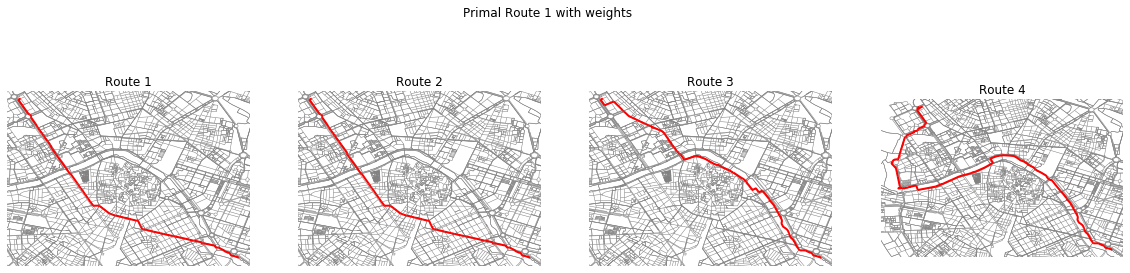

In [21]:
routesPR1 = rf.plot_routes(routeN=4, routeC='red', route_list=PR1_array, base=edgesP,title='Primal Route 1 with weights')

# 2.2 route1 in dual graph

In [23]:
#method 2, mapping from streetID
originDN1 = routePR1w1.edgeID.iloc[0]
desDN1 = routePR1w1.edgeID.iloc[-1]
originDN1, desDN1

(25899, 4316)

In [24]:
edgeDR1w1, routeDR1w1, nodeDR1w1=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA1')

Time to cycle through 7515.31m with weightA1 is 27.21min. 
Cycled uphill for 35.61m, downhill for 16.77m, time confused by angular change is 12.35s.


In [25]:
edgeDR1w2, routeDR1w2, nodeDR1w2=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA2')

Time to cycle through 6270.5m with weightA2 is 22.65min. 
Cycled uphill for 37.29m, downhill for 18.46m, time confused by angular change is 16.74s.


In [26]:
edgeDR1w3, routeDR1w3, nodeDR1w3=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA3')

Time to cycle through 6267.1m with weightA3 is 27.08min. 
Cycled uphill for 36.85m, downhill for 18.03m, time confused by angular change is 19.42s.


In [27]:
edgeDR1w4, routeDR1w4, nodeDR1w4=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN1, desDN1, 'weightA4')

Time to cycle through 6447.25m with weightA4 is 28.38min. 
Cycled uphill for 36.83m, downhill for 18.01m, time confused by angular change is 37.55s.


In [28]:
DR1_array = [routeDR1w1,routeDR1w2,routeDR1w3,routeDR1w4]

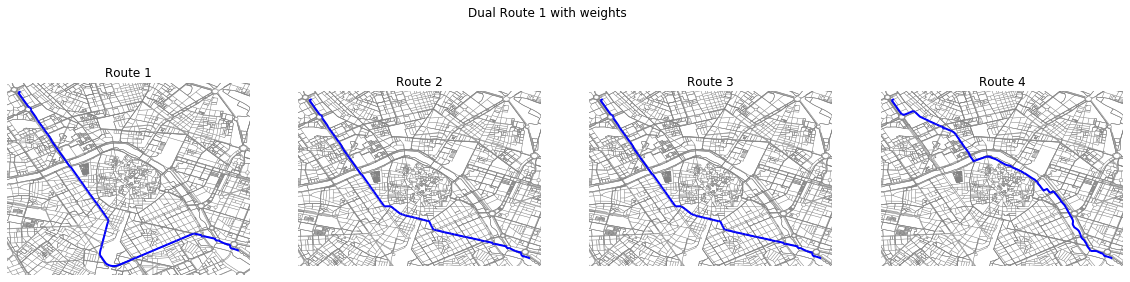

In [29]:
routesDR1 = rf.plot_routes(routeN=4, routeC='blue', route_list=DR1_array, base=edgesP,title='Dual Route 1 with weights')

## 3.1 Route 2 Primal graph 

In [22]:
originPN2 = ox.get_nearest_node(PrimalDiG, originC2)
desPN2 = ox.get_nearest_node(PrimalDiG, desC2)
originPN2, desPN2

(5519, 14252)

In [23]:
routePR2w1, edgePR2w1,nodePR2w1 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN2, desPN2,'weightP1')

Time to cycle through 6374.14m with weightP1 is 23.56min. 
Cycled uphill for 26.64m, downhill for 16.63m, time confused by angular change is 38.83s. 


In [24]:
routePR2w2, edgePR2w2,nodePR2w2 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN2, desPN2,'weightP2')

Time to cycle through 6374.14m with weightP2 is 26.85min. 
Cycled uphill for 26.64m, downhill for 16.63m, time confused by angular change is 38.83s. 


In [25]:
routePR2w3, edgePR2w3,nodePR2w3 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN2, desPN2,'weightP3')

Time to cycle through 6385.86m with weightP3 is 29.5min. 
Cycled uphill for 27.17m, downhill for 17.12m, time confused by angular change is 79.17s. 


In [26]:
routePR2w4, edgePR2w4,nodePR2w4 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN2, desPN2,'weightBike')

Time to cycle through 8586.72m with weightBike is 31.94min. 
Cycled uphill for 32.47m, downhill for 22.49m, time confused by angular change is 114.32s. 


In [29]:
PR2_array = [routePR2w1,routePR2w2,routePR2w3,routePR2w4]

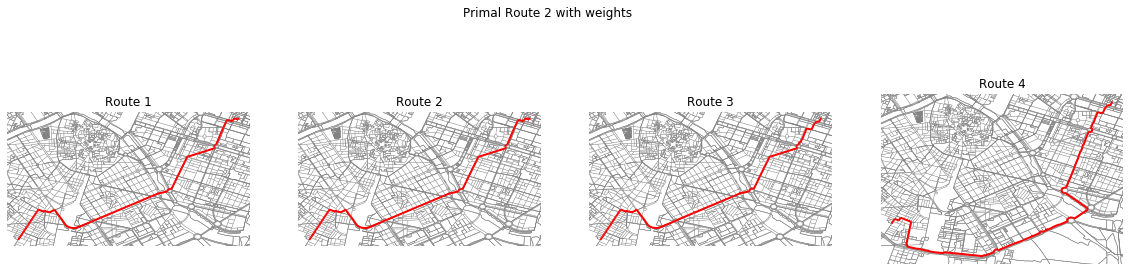

In [30]:
routesPR2 = rf.plot_routes(routeN=4, routeC='red', route_list=PR2_array, base=edgesP,title='Primal Route 2 with weights')

## 3.2 Route 2 Dual graph 

In [28]:
# mapping from streetID
originDN2 = routePR2w1.edgeID.iloc[0]
desDN2 = routePR2w1.edgeID.iloc[-1]
originDN2, desDN2

(10041, 8129)

In [29]:
edgeDR2w1, routeDR2w1,nodeDR2w1=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA1')

Time to cycle through 10885.3m with weightA1 is 40.48min. 
Cycled uphill for 41.48m, downhill for 31.42m, time confused by angular change is 21.43s.


In [30]:
edgeDR2w2, routeDR2w2,nodeDR2w2=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA2')

Time to cycle through 6374.14m with weightA2 is 23.84min. 
Cycled uphill for 26.64m, downhill for 16.63m, time confused by angular change is 38.83s.


In [31]:
edgeDR2w3, routeDR2w3,nodeDR2w3=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA3')

Time to cycle through 6374.14m with weightA3 is 27.06min. 
Cycled uphill for 26.64m, downhill for 16.63m, time confused by angular change is 38.83s.


In [32]:
edgeDR2w4, routeDR2w4,nodeDR2w4=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN2, desDN2, 'weightA4')

Time to cycle through 6530.7m with weightA4 is 30.17min. 
Cycled uphill for 33.79m, downhill for 23.74m, time confused by angular change is 44.85s.


In [33]:
DR2_array = [routeDR2w1,routeDR2w2, routeDR2w3,routeDR2w4]

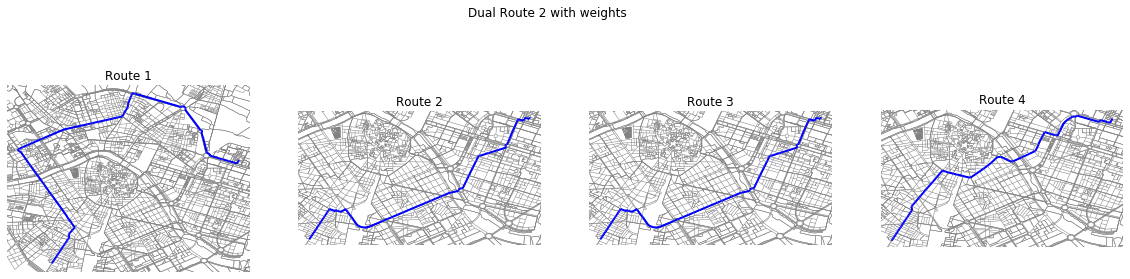

In [37]:
routesDR2 = rf.plot_routes(routeN=4, routeC='blue', route_list=DR2_array, base=edgesP,title='Dual Route 2 with weights')

## 4.1 Route 3 Primal graph 

In [34]:
originPN3 = ox.get_nearest_node(PrimalDiG, originC3)
desPN3 = ox.get_nearest_node(PrimalDiG, desC3)
originPN3, desPN3

(8863, 8040)

In [35]:
routePR3w1, edgePR3w1,nodePR3w1 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN3, desPN3,'weightP1')

Time to cycle through 6731.39m with weightP1 is 25.04min. 
Cycled uphill for 15.86m, downhill for 27.97m, time confused by angular change is 111.36s. 


In [36]:
routePR3w2, edgePR3w2,nodePR3w2 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN3, desPN3,'weightP2')

Time to cycle through 6792.54m with weightP2 is 26.76min. 
Cycled uphill for 12.07m, downhill for 24.18m, time confused by angular change is 84.25s. 


In [37]:
routePR3w3, edgePR3w3,nodePR3w3 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN3, desPN3,'weightP3')

Time to cycle through 6767.65m with weightP3 is 28.06min. 
Cycled uphill for 16.02m, downhill for 28.14m, time confused by angular change is 76.91s. 


In [38]:
routePR3w4, edgePR3w4,nodePR3w4 = rf.map_route2(PrimalDiG,edgesP, edgesD, nodesP, originPN3, desPN3,'weightBike')

Time to cycle through 9331.52m with weightBike is 34.72min. 
Cycled uphill for 13.74m, downhill for 25.77m, time confused by angular change is 71.21s. 


In [43]:
PR3_array = [routePR3w1,routePR3w2,routePR3w3,routePR3w4]

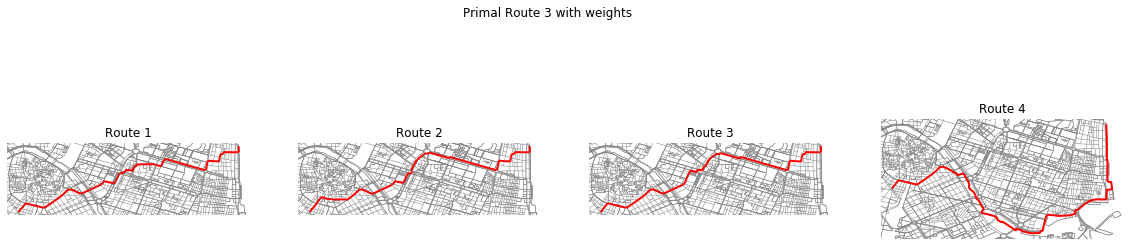

In [44]:
routesPR3 = rf.plot_routes(routeN=4, routeC='red', route_list=PR3_array, base=edgesP,title='Primal Route 3 with weights')

## 4.1 Route 3 Dual graph 

In [39]:
# mapping from streetID
originDN3 = routePR3w1.edgeID.iloc[0]
desDN3 = routePR3w1.edgeID.iloc[-1]
originDN3, desDN3

(16555, 18512)

In [45]:
edgeDR3w1, routeDR3w1,nodeDR3w1=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA1')

Time to cycle through 9859.1m with weightA1 is 36.32min. 
Cycled uphill for 22.29m, downhill for 34.41m, time confused by angular change is 20.22s.


In [46]:
edgeDR3w2, routeDR3w2,nodeDR3w2=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA2')

Time to cycle through 6743.19m with weightA2 is 25.48min. 
Cycled uphill for 15.5m, downhill for 27.62m, time confused by angular change is 65.58s.


In [47]:
edgeDR3w3, routeDR3w3,nodeDR3w3=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA3')

Time to cycle through 6763.67m with weightA3 is 27.22min. 
Cycled uphill for 14.52m, downhill for 26.63m, time confused by angular change is 63.6s.


In [48]:
edgeDR3w4, routeDR3w4,nodeDR3w4=rf.map_dual_route2(DualDiG,edgesD, edgesP, nodesP,  originDN3, desDN3, 'weightA4')

Time to cycle through 6841.13m with weightA4 is 28.42min. 
Cycled uphill for 16.65m, downhill for 28.75m, time confused by angular change is 54.89s.


In [50]:
DR3_array = [routeDR3w1, routeDR3w2, routeDR3w3, routeDR3w4]

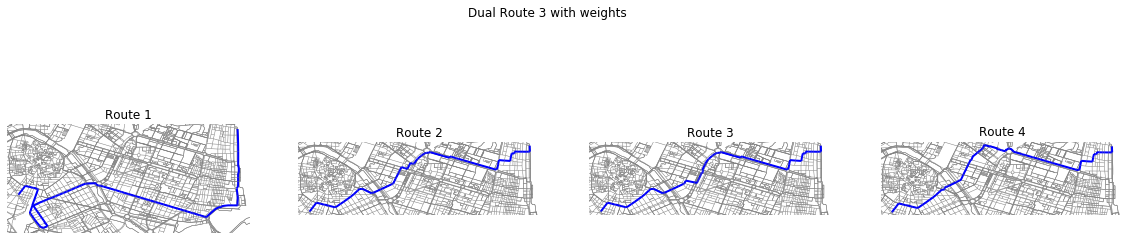

In [51]:
routesDR3 = rf.plot_routes(routeN=4, routeC='blue', route_list=DR3_array, base=edgesP,title='Dual Route 3 with weights')

## visualize by route 

In [52]:
R1_array = [routePR1w1,routePR1w2,routePR1w4, routeDR1w1]

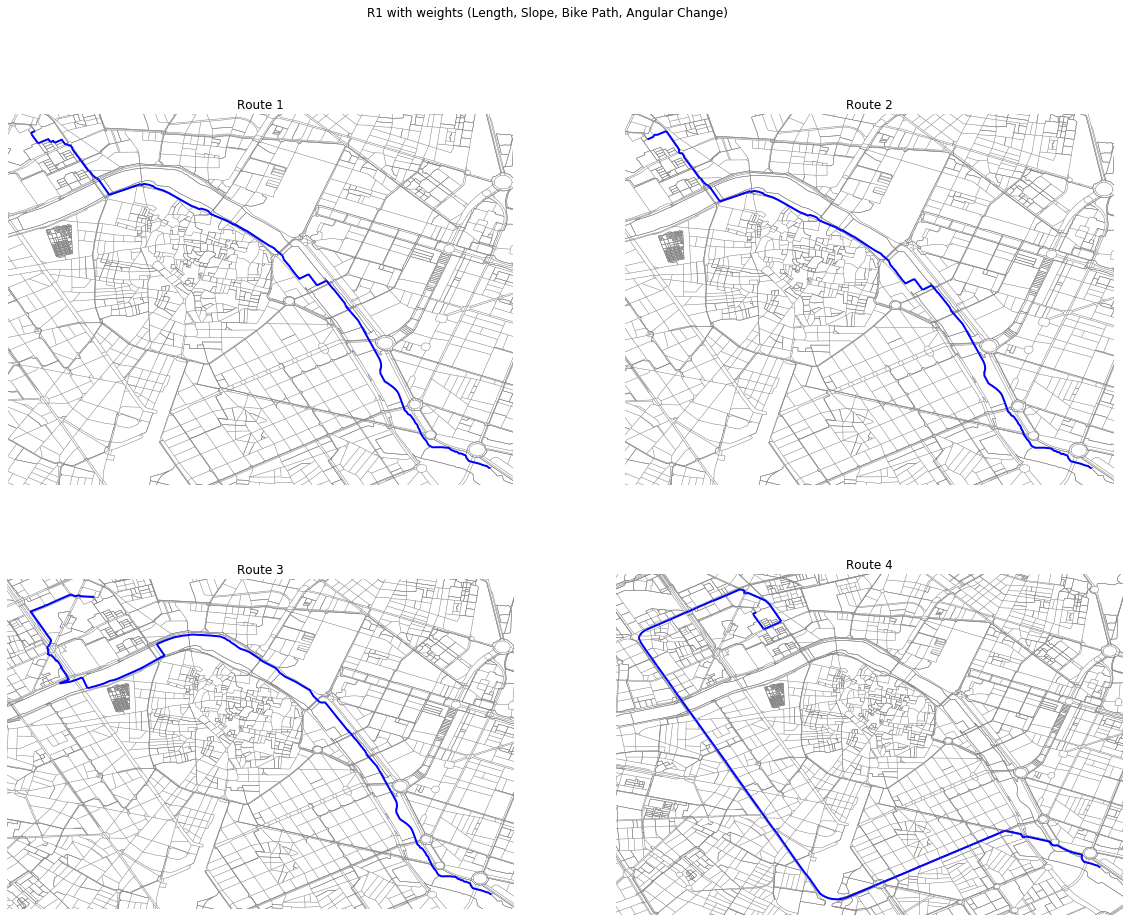

In [102]:
routesR1 = rf.plot_2x2routes(routeN=4, routeC='blue', route_list=R1_array, base=edgesP,title='R1 with weights (Length, Slope, Bike Path, Angular Change)')

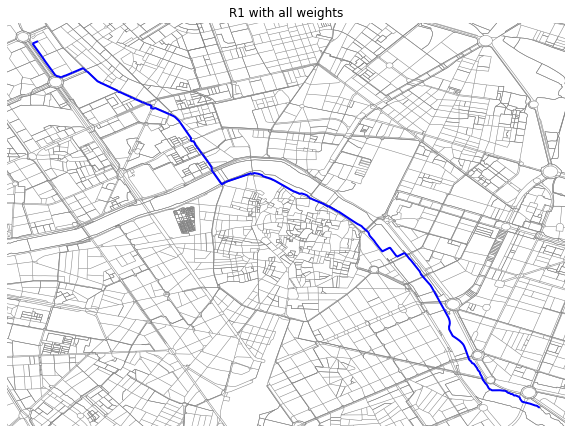

In [103]:
routesR1_all = rf.plot_sigroute(routeC='blue', edgesGdf=routeDR1w4 , base=edgesP,title='R1 with all weights')

## Plot route 2

In [55]:
R2_array = [routePR2w1,routePR2w2,routePR2w4, routeDR2w1]

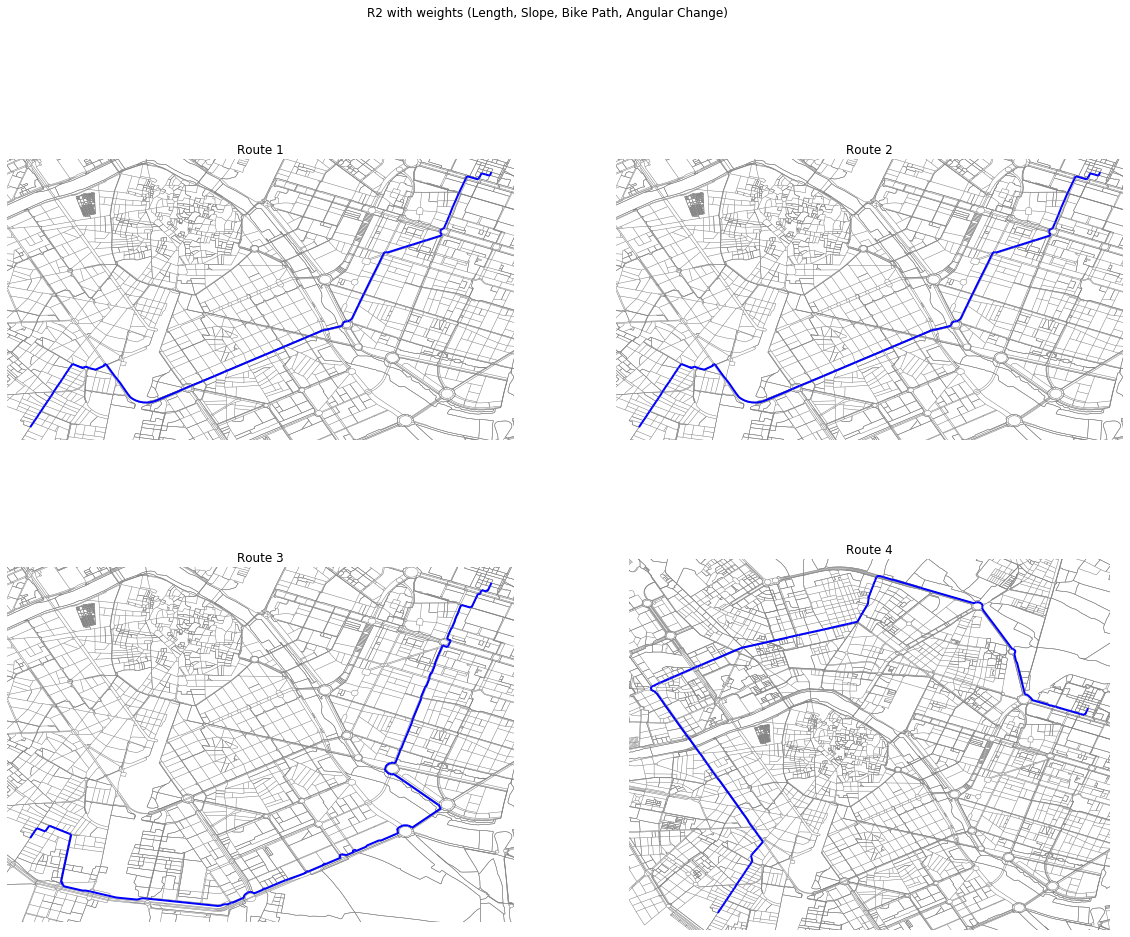

In [56]:
routesR2 = rf.plot_2x2routes(routeN=4, routeC='blue', route_list=R2_array, base=edgesP,title='R2 with weights (Length, Slope, Bike Path, Angular Change)')

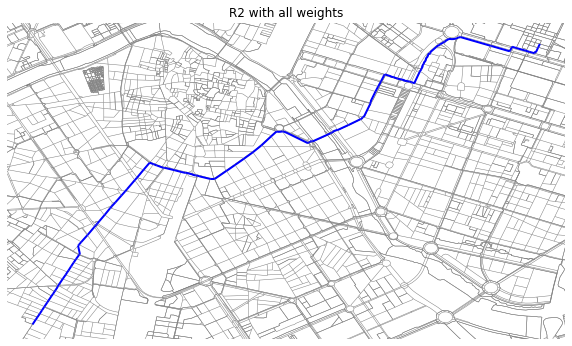

In [57]:
routesR2_all = rf.plot_sigroute(routeC='blue', edgesGdf=routeDR2w4 , base=edgesP,title='R2 with all weights')

## Plot route 3

In [58]:
R3_array = [routePR3w1,routePR3w2,routePR3w4, routeDR3w1]

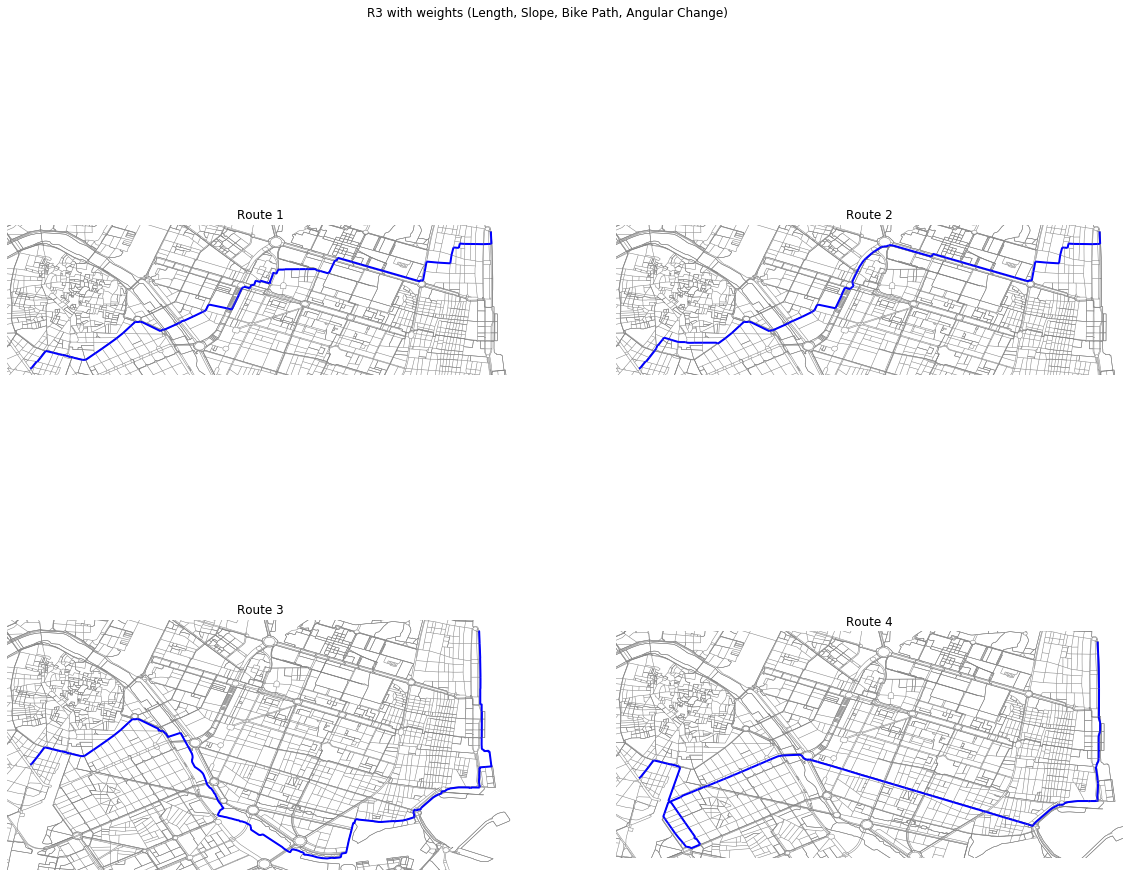

In [59]:
routesR3 = rf.plot_2x2routes(routeN=4, routeC='blue', route_list=R3_array, base=edgesP,title='R3 with weights (Length, Slope, Bike Path, Angular Change)')

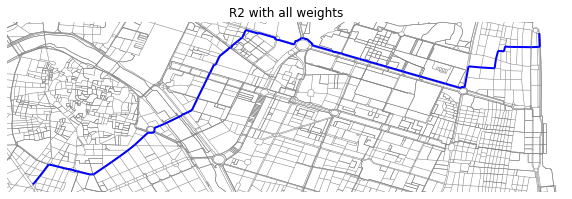

In [60]:
routesR3_all = rf.plot_sigroute(routeC='blue', edgesGdf=routeDR3w4 , base=edgesP,title='R2 with all weights')

### create table with results 

In [104]:
route1df = pd.DataFrame(
{'routeID': ['routePR1w1','routePR1w2','routePR1w3','routePR1w4','routeDR1w1','routeDR1w2','routeDR1w3','routeDR1w4']
    })

In [105]:
def addCol_toTable(routedf):
    routedf['length'] = 0
    routedf['time']= 0
    routedf['uphill'] = 0
    routedf['downhill'] = 0
    routedf['angConf'] = 0
    routedf['bikeP'] = 0

    routedf.length = routedf.length.astype(float)
    routedf.time = routedf.time.astype(float)
    routedf.uphill = routedf.uphill.astype(float)
    routedf.downhill = routedf.downhill.astype(float)
    routedf.bikeP = routedf.bikeP.astype(float)
    routedf.angConf = routedf.angConf.astype(float)
    
    return routedf

In [106]:
route1s = [routePR1w1,routePR1w2,routePR1w3,routePR1w4,routeDR1w1,routeDR1w2,routeDR1w3,routeDR1w4]

In [107]:
edges1s = [edgePR1w1,edgePR1w2,edgePR1w3,edgePR1w4,edgeDR1w1,edgeDR1w2,edgeDR1w3,edgeDR1w4]

In [108]:
weight =['weightP1','weightP2','weightP3','weightBike','weightA1','weightA2','weightA3','weightA4']

In [66]:
#prerequesite: route, edge, weight array

def stats_toTable(routedf, rArray, eArray):
    #adding length, uphill, downhill, bikeP%
    for i in range(len(rArray)):
        routedf.length[i] = round((np.sum(rArray[i]['length'])),2)
        routedf.uphill[i] = round(np.sum(rArray[i][rArray[i]['grade']>0]['grade']*rArray[i][rArray[i]['grade']>0]['length']),2)
        routedf.downhill[i] = round(np.sum(rArray[i][rArray[i]['grade']<0]['grade_abs']*rArray[i][rArray[i]['grade']<0]['length']),2)
        routedf.bikeP[i] = round((np.sum(rArray[i].loc[rArray[i]['hasBikeP']==1]['length'])/routedf.length[i])*100,2)

    #adding angular confusion in seconds
    for i in range(len(eArray)):
        routedf.angConf[i] = round((np.sum(eArray[i]['angConf'])),2)

    #adding cycling time 
    #for primal routes need to calculated by primal edge, dual on dual edges
    for i in range(0,4):
        routedf.time[i] = round((np.sum(rArray[i]['weightP1']))/60,2) if weight[i] == 'weightBike' else round((np.sum(rArray[i][str(weight[i])]))/60,2)
    for i in range(4, len(edges1s)):
        routedf.time[i] = round((np.sum(eArray[i]['weightA2']))/60,2) if weight[i] == 'weightA1' else round((np.sum(eArray[i][str(weight[i])]))/60,2)    
    
    return routedf

In [109]:
route1df = addCol_toTable(route1df)
route1df = stats_toTable(route1df, route1s, edges1s )

In [110]:
route1df

routeID   length   time  uphill  downhill  angConf  bikeP
0  routePR1w1 6258.880 23.280  36.910    18.100   33.310 45.940
1  routePR1w2 6264.190 27.820  36.590    17.800   36.830 49.550
2  routePR1w3 6388.810 28.820  36.730    17.910   51.520 87.910
3  routePR1w4 9163.890 34.090  36.900    16.010   57.430 98.740
4  routeDR1w1 7515.310 27.210  35.610    16.770   12.350 13.340
5  routeDR1w2 6270.500 22.650  37.290    18.460   16.740 32.290
6  routeDR1w3 6267.100 27.080  36.850    18.030   19.420 46.010
7  routeDR1w4 6447.250 28.380  36.830    18.010   37.550 91.590

## Route 2

In [69]:
route2df = pd.DataFrame(
{'routeID': ['routePR2w1','routePR2w2','routePR2w3','routePR2w4','routeDR2w1','routeDR2w2','routeDR2w3','routeDR2w4'] })

In [70]:
route2s = [routePR2w1,routePR2w2,routePR2w3,routePR2w4,routeDR2w1,routeDR2w2,routeDR2w3,routeDR2w4]

In [71]:
edges2s = [edgePR2w1,edgePR2w2,edgePR2w3,edgePR2w4,edgeDR2w1,edgeDR2w2,edgeDR2w3,edgeDR2w4]

In [72]:
route2df = addCol_toTable(route2df)
route2df = stats_toTable(route2df, route2s, edges2s )

In [73]:
route2df

routeID    length   time  uphill  downhill  angConf  bikeP
0  routePR2w1  6374.140 23.560  26.640    16.630   38.830  5.310
1  routePR2w2  6374.140 26.850  26.640    16.630   38.830  5.310
2  routePR2w3  6385.860 29.500  27.170    17.120   79.170 43.800
3  routePR2w4  8586.720 31.940  32.470    22.490  114.320 95.200
4  routeDR2w1 10885.300 40.480  41.480    31.420   21.430  7.510
5  routeDR2w2  6374.140 23.840  26.640    16.630   38.830  5.310
6  routeDR2w3  6374.140 27.060  26.640    16.630   38.830  5.310
7  routeDR2w4  6530.700 30.170  33.790    23.740   44.850 66.700

## Route3

In [74]:
route3df = pd.DataFrame(
{'routeID': ['routePR3w1','routePR3w2','routePR3w3','routePR3w4','routeDR3w1','routeDR3w2','routeDR3w3','routeDR3w4'] })

In [75]:
route3s = [routePR3w1,routePR3w2,routePR3w3,routePR3w4,routeDR3w1,routeDR3w2,routeDR3w3,routeDR3w4]

In [76]:
edges3s = [edgePR3w1,edgePR3w2,edgePR3w3,edgePR3w4,edgeDR3w1,edgeDR3w2,edgeDR3w3,edgeDR3w4]

In [77]:
route3df = addCol_toTable(route3df)
route3df = stats_toTable(route3df, route3s, edges3s )

In [78]:
route3df

routeID   length   time  uphill  downhill  angConf   bikeP
0  routePR3w1 6731.390 25.040  15.860    27.970  111.360  59.120
1  routePR3w2 6792.540 26.760  12.070    24.180   84.250  34.730
2  routePR3w3 6767.650 28.060  16.020    28.140   76.910  79.980
3  routePR3w4 9331.520 34.720  13.740    25.770   71.210 100.000
4  routeDR3w1 9859.100 36.320  22.290    34.410   20.220  19.380
5  routeDR3w2 6743.190 25.480  15.500    27.620   65.580  53.580
6  routeDR3w3 6763.670 27.220  14.520    26.630   63.600  51.330
7  routeDR3w4 6841.130 28.420  16.650    28.750   54.890  80.080

## Save files (64!!)

In [79]:
#initialise path, names, etc.

city_name = 'Valencia'
saving_path ='dataComp/'+'Valencia' +'/'
epsg = 4326
crs = {'init': 'epsg:4326', 'no_defs': True}

In [80]:
#saving_path1
saving_path1 = 'dataComp/'+'ValenciaR1/'
crs = {'init': 'epsg:4326', 'no_defs': True}

routePR1w1.crs = crs
routePR1w1.to_file(saving_path1+'routePR1w1.shp', driver='ESRI Shapefile')

In [111]:
route1snm = ['routePR1w1','routePR1w2','routePR1w3','routePR1w4','routeDR1w1','routeDR1w2','routeDR1w3','routeDR1w4']
route2snm = ['routePR2w1','routePR2w2','routePR2w3','routePR2w4','routeDR2w1','routeDR2w2','routeDR2w3','routeDR2w4']
route3snm = ['routePR3w1','routePR3w2','routePR3w3','routePR3w4','routeDR3w1','routeDR3w2','routeDR3w3','routeDR3w4']

In [82]:
def save_route(folderName, rArray, nameArray):
    s_path = 'dataComp/'+ folderName+'/'
    crs = {'init': 'epsg:4326', 'no_defs': True}
    
    for i in range(len(rArray)):
        rArray[i].crs = crs
        rArray[i].to_file(s_path+nameArray[i]+'.shp', driver='ESRI Shapefile')

In [83]:
save_route('ValenciaR1', route1s, route1snm)
save_route('ValenciaR2', route2s, route2snm)
save_route('ValenciaR3', route3s, route3snm)

In [112]:
edge1snm = ['edgePR1w1','edgePR1w2','edgePR1w3','edgePR1w4','edgeDR1w1','edgeDR1w2','edgeDR1w3','edgeDR1w4']
edge2snm = ['edgePR2w1','edgePR2w2','edgePR2w3','edgePR2w4','edgeDR2w1','edgeDR2w2','edgeDR2w3','edgeDR2w4']
edge3snm = ['edgePR3w1','edgePR3w2','edgePR3w3','edgePR3w4','edgeDR3w1','edgeDR3w2','edgeDR3w3','edgeDR3w4']

In [85]:
save_route('ValenciaR1', edges1s, edge1snm)
save_route('ValenciaR2', edges2s, edge2snm)
save_route('ValenciaR3', edges3s, edge3snm)

In [124]:
##save as csv
saving_path_csv = 'dataComp/'+'ValenciaCSV/'+'route1df.csv'
route1df.to_csv(saving_path_csv)

In [125]:
##save as csv
saving_path_csv = 'dataComp/'+'ValenciaCSV/'+'route2df.csv'
route2df.to_csv(saving_path_csv)

In [126]:
##save as csv
saving_path_csv = 'dataComp/'+'ValenciaCSV/'+'route3df.csv'
route3df.to_csv(saving_path_csv)

In [49]:
dill.dump_session('part3RoutingNVis_VAL_v3.db')

In [14]:
dill.load_session('part3RoutingNVis_VAL_v2.db')